# Overview Figure of Methow and Tuolumne Watersheds

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from contextily.tile import warp_img_transform, warp_tiles, _warper
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from mpl_toolkits.basemap import Basemap
import rioxarray as rxr
import rasterio as rio
import datetime
import pickle


In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.size'] = '12'

In [4]:
#tuol_outline = gpd.read_file('../../../data/site_outlines/UpperTuolRiverBasinOutline.geojson')
met_outline = pickle.load(open('../../../data/site_outlines/methow_outline_32610.pkl', 'rb'))
methow_reverse = pickle.load(open('../../../data/site_outlines/methow_reverse.pkl', 'rb'))
snotel_geom = pickle.load(open('../../../SlideRule_methow/data/snotel/snotel_geometries_5km.pkl', 'rb'))
img_methow = mpimg.imread('../../../SlideRule_methow/data/Methow_pic.jpg')

states = gpd.read_file('../../../data/misc/state_bounds/state_bounds.shp')

In [5]:
#atl06sr_gdf = pickle.load(open('../../data/ATL06sr/tuolumne_all_sr-atl06-09282022_processed_bicubic_snowonaso.pkl', 'rb'))
cdec_geom = pickle.load(open('../../data/CDEC/cdec_geometries.pkl', 'rb'))
outline_gdf = pickle.load(open('../../../data/site_outlines/tuolumne_outline_32611.pkl', 'rb'))
tuol_reverse = pickle.load(open('../../../data/misc/tuol_reverse.pkl', 'rb'))
img_tuol = mpimg.imread('../../data/tuolumne_pic.jpg')

In [6]:
hillshade_methow = rxr.open_rasterio('../../../data/lidar/methow/dtm/methow_basin_2018_dtm_combined_32610_100m_hillshade.tif', masked=True).squeeze()
dtm_methow = rxr.open_rasterio('../../../data/lidar/methow/dtm/methow_basin_2018_dtm_combined_32610_100m.tif', masked=True).squeeze()

hillshade_tuol = rxr.open_rasterio('../../../data/lidar/tuolumne/snow_off/ASO_3M_PCDTM_USCATE_20191010_studyextent_100m_hillshade.tif', masked=True).squeeze()
dtm_tuol = rxr.open_rasterio('../../../data/lidar/tuolumne/snow_off/ASO_3M_PCDTM_USCATE_20191010_studyextent_100m.tif', masked=True).squeeze()

In [7]:
aso_date_list = [datetime.date(2019, 3, 24),
 datetime.date(2019, 4, 17),
 datetime.date(2019, 5, 3),
 datetime.date(2020, 4, 13),
 datetime.date(2020, 5, 22),
 datetime.date(2021, 2, 25),
 datetime.date(2022, 2, 4),
 datetime.date(2022, 4, 5)]

In [16]:
atl06sr_gdf.head()

distance   h_sigma  rgt    delta_time  \
time                                                                       
2018-10-15 23:22:20.018965444  4.215353e+06  0.033182  265  2.488094e+07   
2018-10-15 23:22:20.021811344  4.215373e+06  0.028329  265  2.488094e+07   
2018-10-15 23:22:20.027481712  4.215413e+06  0.032855  265  2.488094e+07   
2018-10-15 23:22:20.030305900  4.215434e+06  0.041974  265  2.488094e+07   
2018-10-15 23:22:20.033126928  4.215454e+06  0.045422  265  2.488094e+07   

                               pflags  dh_fit_dy  segment_id  \
time                                                           
2018-10-15 23:22:20.018965444       0        0.0      210188   
2018-10-15 23:22:20.021811344       0        0.0      210189   
2018-10-15 23:22:20.027481712       0        0.0      210191   
2018-10-15 23:22:20.030305900       0        0.0      210192   
2018-10-15 23:22:20.033126928       0        0.0      210193   

                               w_surface_window_final  dh_fit_dx       h_mean  \
time                                                                            
2018-10-15 23:22:20.018965444                     3.0  -0.018228  2501.377184   
2018-10-15 23:22:20.021811344                     3.0  -0.010939  2501.116873   
2018-10-15 23:22:20.027481712                     3.0  -0.000515  2501.053838   
2018-10-15 23:22:20.030305900                     3.0   0.008181  2501.176924   
2018-10-15 23:22:20.033126928                     3.0   0.004802  2501.271832   

                               ...  difference_bicubic      site     acqdate  \
time                           ...                                             
2018-10-15 23:22:20.018965444  ...           -0.318142  tuolumne  2018-10-15   
2018-10-15 23:22:20.021811344  ...           -0.132278  tuolumne  2018-10-15   
2018-10-15 23:22:20.027481712  ...           -0.171085  tuolumne  2018-10-15   
2018-10-15 23:22:20.030305900  ...           -0.082984  tuolumne  2018-10-15   
2018-10-15 23:22:20.033126928  ...           -0.220969  tuolumne  2018-10-15   

                                 n  diff_plus diff_plus_bicubic    zscore  \
time                                                                        
2018-10-15 23:22:20.018965444  919  -0.178201         -0.215620 -0.052818   
2018-10-15 23:22:20.021811344  919   0.061488         -0.029756 -0.035698   
2018-10-15 23:22:20.027481712  919  -0.011557         -0.068563 -0.040916   
2018-10-15 23:22:20.030305900  919   0.171344          0.019538 -0.027852   
2018-10-15 23:22:20.033126928  919  -0.173689         -0.118447 -0.052496   

                               ASO_snowon  ASO_snowon_date ASO_snowon_bic  
time                                                                       
2018-10-15 23:22:20.018965444         NaN              NaN            NaN  
2018-10-15 23:22:20.021811344         NaN              NaN            NaN  
2018-10-15 23:22:20.027481712         NaN              NaN            NaN  
2018-10-15 23:22:20.030305900         NaN              NaN            NaN  
2018-10-15 23:22:20.033126928         NaN              NaN            NaN  

[5 rows x 34 columns]

In [33]:
snotel_geom

code            name network  elevation_m  \
0  1259_WA_SNTL       Muckamuck  SNOTEL  1362.456055   
1   728_WA_SNTL  Salmon Meadows  SNOTEL  1359.407959   
2           NaN             NaN     NaN          NaN   
3           NaN             NaN     NaN          NaN   

                                       site_property  \
0  {'county': 'Okanogan', 'state': 'Washington', ...   
1  {'county': 'Okanogan', 'state': 'Washington', ...   
2                                                NaN   
3                                                NaN   

                                            geometry  elevation_transformed  \
0                     POINT (731093.784 5386094.282)            1362.456055   
1                     POINT (732831.735 5393950.294)            1359.407959   
2  POLYGON ((736093.784 5386094.282, 736069.707 5...                    NaN   
3  POLYGON ((737831.735 5393950.294, 737807.658 5...                    NaN   

         site  
0         NaN  
1         NaN  
2    muck_5km  
3  salmon_5km

In [22]:
atl06sr_gdf['date_offset'] = np.nan
for date in aso_date_list:
    atl06sr_gdf.loc[atl06sr_gdf['ASO_snowon_date']==date, 'date_offset'] = np.subtract(atl06sr_gdf.loc[atl06sr_gdf['ASO_snowon_date']==date, 'acqdate'],atl06sr_gdf.loc[atl06sr_gdf['ASO_snowon_date']==date,'ASO_snowon_date']).abs().dt.days

NameError: name 'atl06sr_gdf' is not defined

In [78]:
atl06sr_gdf['date_offset'].unique()

array([nan, Timedelta('-12 days +00:00:00'),
       Timedelta('-7 days +00:00:00'), Timedelta('11 days 00:00:00'),
       Timedelta('-6 days +00:00:00'), Timedelta('17 days 00:00:00'),
       Timedelta('-17 days +00:00:00'), Timedelta('2 days 00:00:00'),
       Timedelta('-2 days +00:00:00')], dtype=object)

In [8]:
tuol_outline = tuol_outline[0:1]

In [7]:
tuol_outline.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

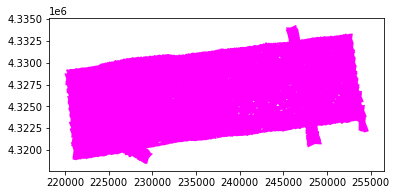

In [13]:
gm_outline.plot(facecolor='magenta')

In [14]:
gm_outline.crs

<Projected CRS: EPSG:32613>
Name: WGS 84 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 108°W and 102°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Northwest Territories (NWT); Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-108.0, 0.0, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
met_outline.drop([0,1,2])

fn  date  \
3  ./datasetsA/methow_basin_2018/dtm/raw/methow_b...  2018   

                                            geometry  
3  POLYGON ((-120.33042 48.80903, -120.33042 48.8...

In [9]:
met_outline.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
tuol_outline.to_crs('epsg:32611').area / 1e6

0    1181.214
dtype: float64

In [20]:
met_outline.to_crs('epsg:32610').area / 1e6

0    1.655314e-06
1    8.290758e-07
2    8.314041e-07
3    1.792769e+03
dtype: float64

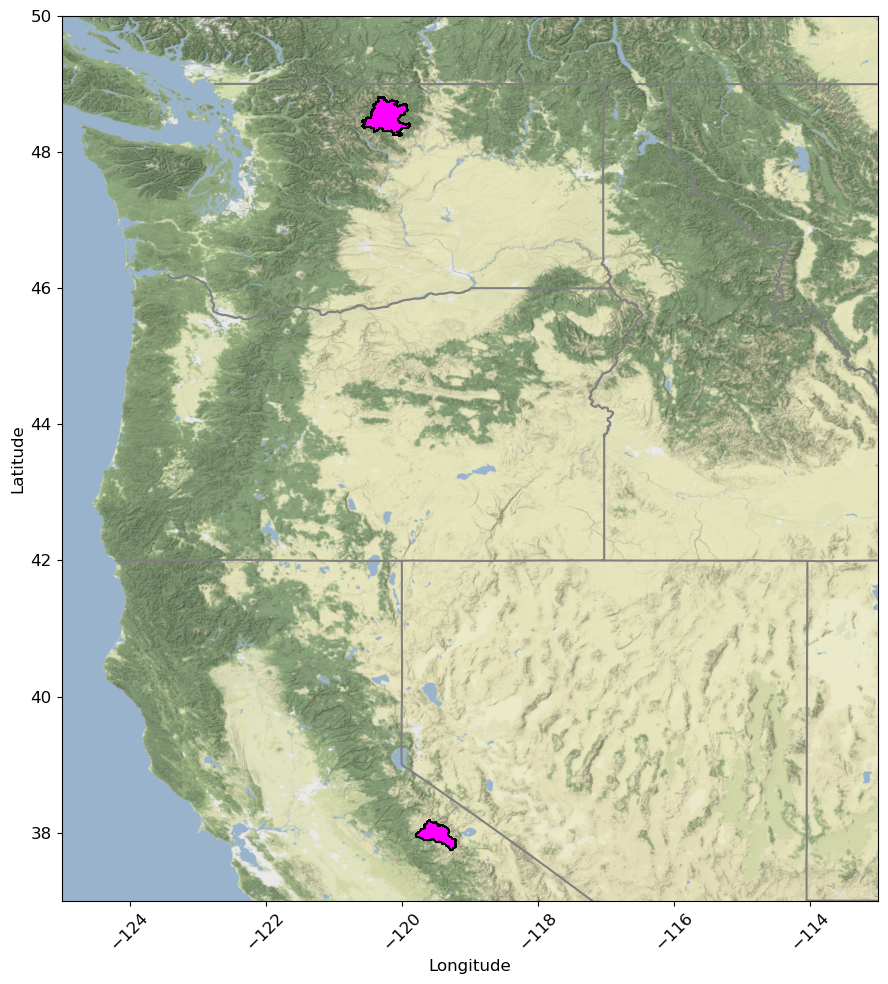

In [11]:
basemap = cx.providers.Stamen.TerrainBackground
extent = ([-125, 37, -113, 50])

f, axa = plt.subplots(figsize=(10,10))

met_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
tuol_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
gm_outline.to_crs('epsg:4326').plot(ax=axa, facecolor='magenta', edgecolor='k')
states.plot(ax=axa, edgecolor='gray')

axa.set_xlim(extent[0], extent[2])
axa.set_ylim(extent[1], extent[3])
cx.add_basemap(axa, attribution=False, crs='epsg:4326', source=basemap, zoom=9)
plt.xticks(rotation=45)
axa.set_xlabel('Longitude')
axa.set_ylabel('Latitude')
plt.tight_layout()
plt.savefig('../../figures/polished/tm_sites_map.jpeg',dpi=500)

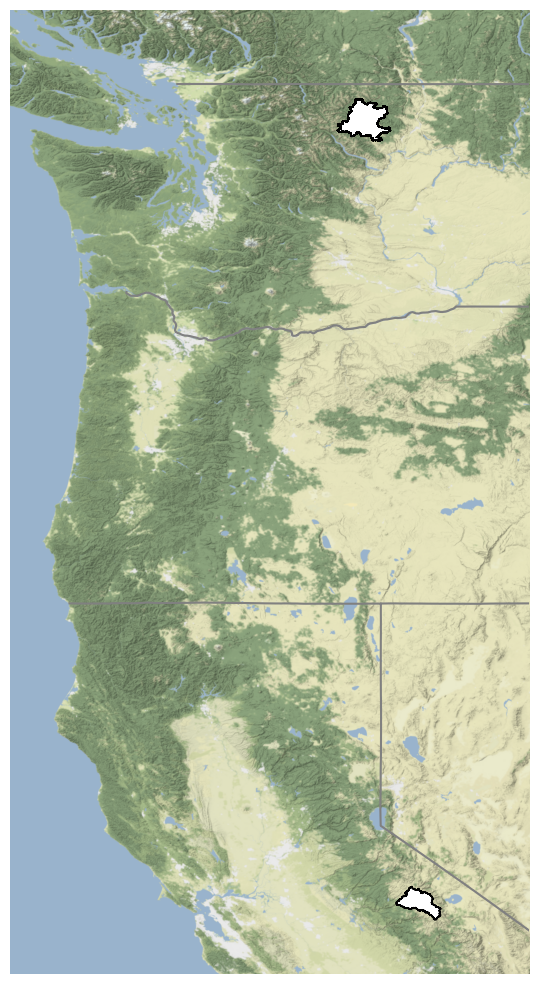

In [10]:
basemap = cx.providers.Stamen.TerrainBackground
extent = ([-125, 37, -118, 50])

f, axa = plt.subplots(figsize=(10,10))

met_outline.plot(ax=axa, facecolor='white', edgecolor='k', linewidth=1)
outline_gdf.to_crs('epsg:4326').plot(ax=axa, facecolor='white', edgecolor='k', linewidth=1)
#gm_outline.to_crs('epsg:4326').plot(ax=axa, facecolor='magenta', edgecolor='k')
states.plot(ax=axa, edgecolor='gray')

axa.set_xlim(extent[0], extent[2])
axa.set_ylim(extent[1], extent[3])
cx.add_basemap(axa, attribution=False, crs='epsg:4326', source=basemap, zoom=9)
axa.set_axis_off()
#plt.xticks(rotation=45)
#axa.set_xlabel('Longitude')
#axa.set_ylabel('Latitude')
plt.tight_layout()
#plt.savefig('../../figures/polished/tm_sites_map_skinny_noaxes.jpeg',dpi=500)

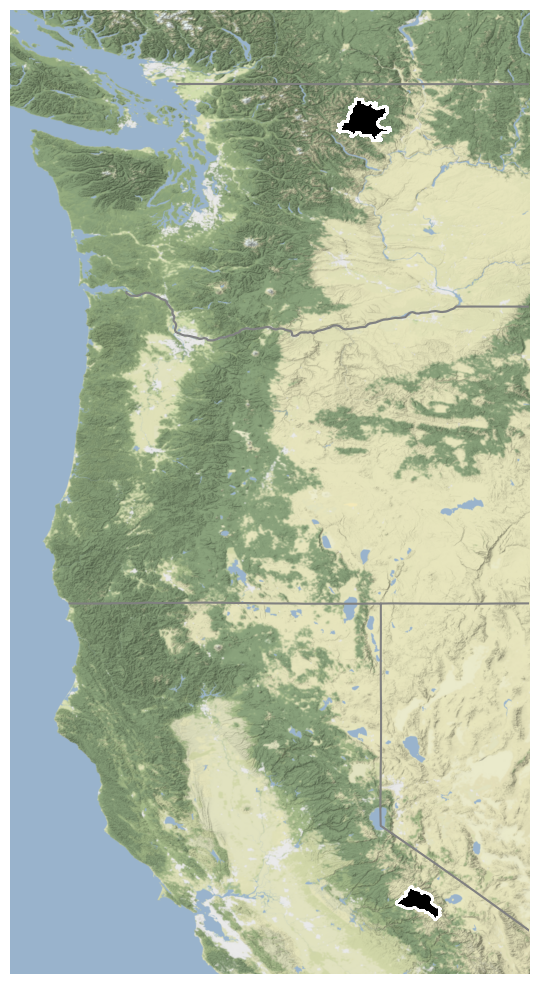

In [13]:
basemap = cx.providers.Stamen.TerrainBackground
extent = ([-125, 37, -118, 50])

f, axa = plt.subplots(figsize=(10,10))

met_outline.plot(ax=axa, facecolor='k', edgecolor='white', linewidth=1.5)
outline_gdf.to_crs('epsg:4326').plot(ax=axa, facecolor='k', edgecolor='white', linewidth=1.5)
#gm_outline.to_crs('epsg:4326').plot(ax=axa, facecolor='magenta', edgecolor='k')
states.plot(ax=axa, edgecolor='gray')

axa.set_xlim(extent[0], extent[2])
axa.set_ylim(extent[1], extent[3])
cx.add_basemap(axa, attribution=False, crs='epsg:4326', source=basemap, zoom=9)
axa.set_axis_off()
#plt.xticks(rotation=45)
#axa.set_xlabel('Longitude')
#axa.set_ylabel('Latitude')
plt.tight_layout()
plt.savefig('../../figures/polished/tm_sites_map_skinny_noaxes_black.jpeg',dpi=500)

In [41]:
cdec_geom

geometry  elevation_m     site
0                     POINT (293306.562 4194327.335)      2621.28      tum
1                     POINT (301551.877 4196788.619)      2965.00      dan
2  POLYGON ((298306.562 4194327.335, 298282.486 4...          NaN  tum_5km
3  POLYGON ((306551.877 4196788.619, 306527.800 4...          NaN  dan_5km

In [ ]:
cdec_geom_4326 = cdec_geom.to_crs('epsg:4326')
snotel_geom_4326 = snotel_geom.to_crs('epsg:4326')

In [19]:
def fixed_aspect_ratio(ratio):
    '''
    Set a fixed aspect ratio on matplotlib plots 
    regardless of axis units
    '''
    xvals,yvals = plt.gca().axes.get_xlim(),plt.gca().axes.get_ylim()

    xrange = xvals[1]-xvals[0]
    yrange = yvals[1]-yvals[0]
    plt.gca().set_aspect(ratio*(xrange/yrange), adjustable='box')

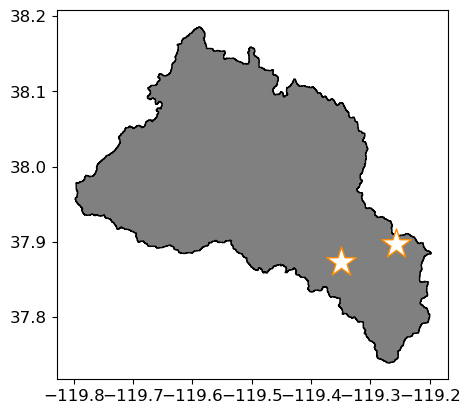

In [26]:
fig, ax = plt.subplots()
outline_gdf.to_crs('epsg:4326').plot(ax=ax, facecolor='grey', edgecolor='k')
cdec_geom[0:2].to_crs('epsg:4326').plot(ax=ax, facecolor='white', edgecolor='darkorange', marker='*', markersize=500)
plt.savefig('../../figures/polished/cdec_symbol_orange.jpeg',dpi=500)

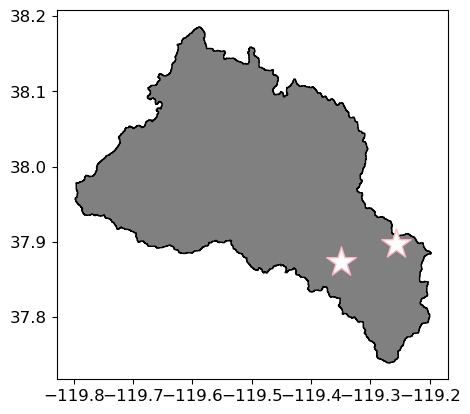

In [27]:
fig, ax = plt.subplots()
outline_gdf.to_crs('epsg:4326').plot(ax=ax, facecolor='grey', edgecolor='k')
cdec_geom[0:2].to_crs('epsg:4326').plot(ax=ax, facecolor='white', edgecolor='lightpink', marker='*', markersize=500)
plt.savefig('../../figures/polished/cdec_symbol_pink.jpeg',dpi=500)

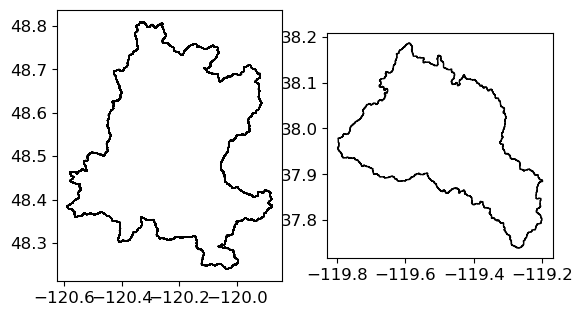

In [26]:
fig, ax = plt.subplots(1,2)

met_outline.to_crs('epsg:4326').plot(ax=ax[0], facecolor='none', edgecolor='k')


outline_gdf.to_crs('epsg:4326').plot(ax=ax[1], facecolor='none', edgecolor='k')


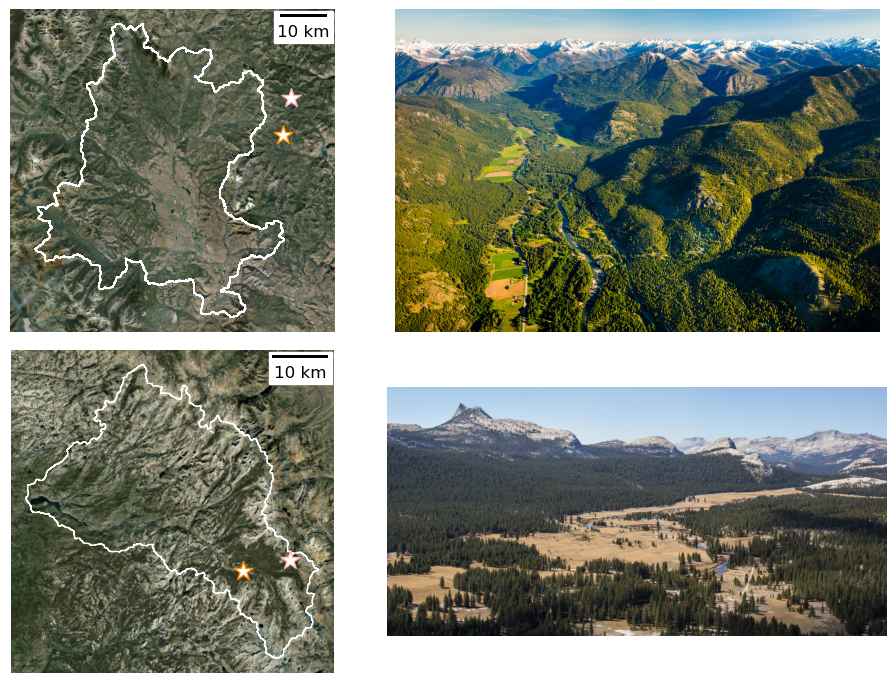

In [25]:
basemap = cx.providers.Esri.WorldImagery

fig, ax = plt.subplots(2,2, figsize=(10,7))


met_outline.to_crs('epsg:32610').plot(ax=ax[0,0], facecolor='none', edgecolor='white')
ax[0,0].set_xlim(673000, 742000)
cx.add_basemap(ax[0,0], attribution=False, crs='epsg:32610', 
               source=basemap, zoom=12)
snotel_geom[0:1].to_crs('epsg:32610').plot(ax=ax[0,0], facecolor='white', edgecolor='darkorange', 
                                          marker='*', markersize=200)
snotel_geom[1:2].to_crs('epsg:32610').plot(ax=ax[0,0], facecolor='white', edgecolor='lightpink', 
                                          marker='*', markersize=200)
ax[0,0].set_axis_off()
#ax[0,0].set_xticklabels(ax[0,0].get_xticks(), rotation = 20)
ax[0,0].add_artist(ScaleBar(1))

#ax['a'].set_ylim(48.2, 48.85)

ax[0,1].imshow(img_methow)
ax[0,1].set_axis_off()

outline_gdf.to_crs('epsg:32612').plot(ax=ax[1,0], facecolor='none', edgecolor='white')
cdec_geom[0:1].to_crs('epsg:32612').plot(ax=ax[1,0], facecolor='white', edgecolor='darkorange', marker='*', markersize=200)
cdec_geom[1:2].to_crs('epsg:32612').plot(ax=ax[1,0], facecolor='white', edgecolor='lightpink', marker='*', markersize=200)
ax[1,0].add_artist(ScaleBar(1))
cx.add_basemap(ax[1,0], attribution=False, crs='epsg:32612', 
               source=basemap, zoom=12)
ax[1,0].set_axis_off()

ax[1,1].imshow(img_tuol)
ax[1,1].set_axis_off()

plt.tight_layout()
plt.savefig('../../figures/polished/sites_w_snotel.jpeg', dpi=500)

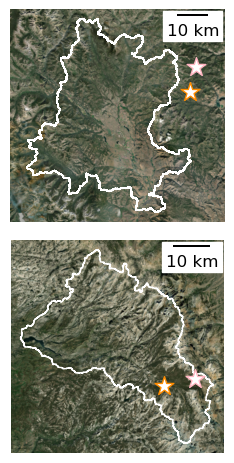

In [10]:
basemap = cx.providers.Esri.WorldImagery

fig, ax = plt.subplots(2,1)


met_outline.to_crs('epsg:32610').plot(ax=ax[0], facecolor='none', edgecolor='white')
ax[0].set_xlim(673000, 742000)
cx.add_basemap(ax[0], attribution=False, crs='epsg:32610', 
               source=basemap, zoom=12)
snotel_geom[0:1].to_crs('epsg:32610').plot(ax=ax[0], facecolor='white', edgecolor='darkorange', 
                                          marker='*', markersize=200)
snotel_geom[1:2].to_crs('epsg:32610').plot(ax=ax[0], facecolor='white', edgecolor='lightpink', 
                                          marker='*', markersize=200)
ax[0].set_axis_off()
#ax[0,0].set_xticklabels(ax[0,0].get_xticks(), rotation = 20)
ax[0].add_artist(ScaleBar(1))

#ax['a'].set_ylim(48.2, 48.85)

# ax[0,1].imshow(img_methow)
# ax[0,1].set_axis_off()

outline_gdf.to_crs('epsg:32612').plot(ax=ax[1], facecolor='none', edgecolor='white')
cdec_geom[0:1].to_crs('epsg:32612').plot(ax=ax[1], facecolor='white', edgecolor='darkorange', marker='*', markersize=200)
cdec_geom[1:2].to_crs('epsg:32612').plot(ax=ax[1], facecolor='white', edgecolor='lightpink', marker='*', markersize=200)
ax[1].add_artist(ScaleBar(1))
cx.add_basemap(ax[1], attribution=False, crs='epsg:32612', 
               source=basemap, zoom=12)
ax[1].set_axis_off()

# ax[1,1].imshow(img_tuol)
# ax[1,1].set_axis_off()

plt.tight_layout()
plt.savefig('../../figures/polished/sites_w_snotel_nopics.jpeg', dpi=500)

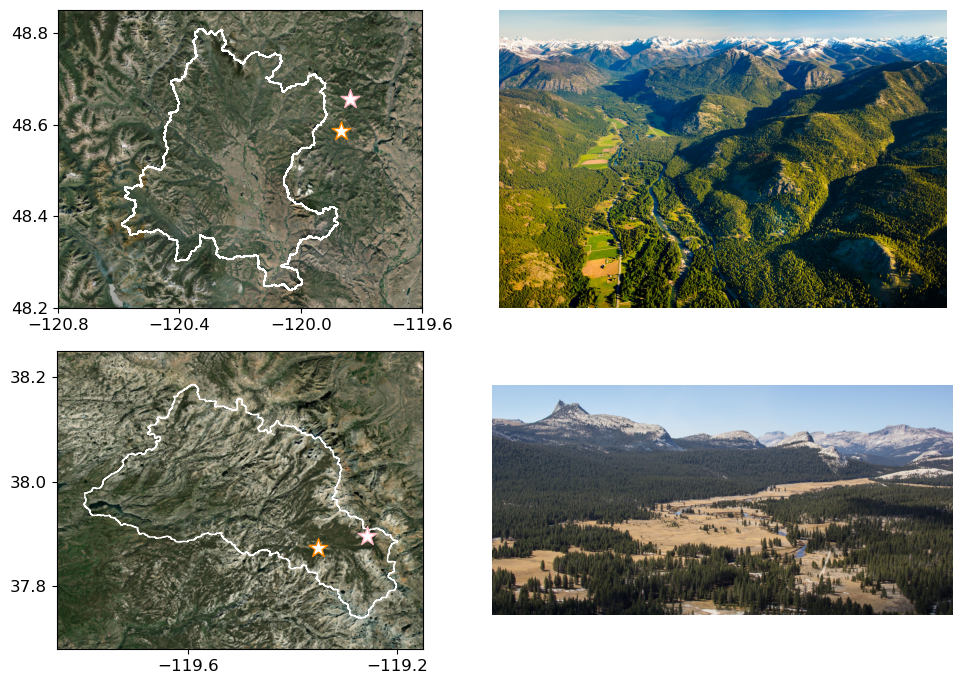

In [27]:
basemap = cx.providers.Esri.WorldImagery
plt.rcParams['font.size'] = '12'
import matplotlib.ticker as plticker

fig, ax = plt.subplot_mosaic([['a', 'b'],
                              ['c', 'd']], figsize=(10,7),
                            gridspec_kw={'height_ratios': [1,1], 'width_ratios': [1,1]})


met_outline.to_crs('epsg:4326').plot(ax=ax['a'], facecolor='none', edgecolor='white')
ax['a'].set_xlim(-120.8, -119.6)
ax['a'].set_ylim(48.2, 48.85)
cx.add_basemap(ax['a'], attribution=False, crs='epsg:4326', 
               source=basemap, zoom=12)
snotel_geom[0:1].to_crs('epsg:4326').plot(ax=ax['a'], facecolor='white', edgecolor='darkorange', 
                                          marker='*', markersize=200)
snotel_geom[1:2].to_crs('epsg:4326').plot(ax=ax['a'], facecolor='white', edgecolor='lightpink', 
                                          marker='*', markersize=200)
loc = plticker.MultipleLocator(base=0.4) # this locator puts ticks at regular intervals
ax['a'].xaxis.set_major_locator(loc)
loc = plticker.MultipleLocator(base=0.2) # this locator puts ticks at regular intervals
ax['a'].yaxis.set_major_locator(loc)

ax['b'].imshow(img_methow)
ax['b']
ax['b'].set_axis_off()

outline_gdf.to_crs('epsg:4326').plot(ax=ax['c'], facecolor='none', edgecolor='white')
cdec_geom[0:1].to_crs('epsg:4326').plot(ax=ax['c'], facecolor='white', edgecolor='darkorange', marker='*', markersize=200)
cdec_geom[1:2].to_crs('epsg:4326').plot(ax=ax['c'], facecolor='white', edgecolor='lightpink', marker='*', markersize=200)
#ax[1,0].add_artist(ScaleBar(1))
ax['c'].set_ylim(37.68, 38.25)
ax['c'].set_xlim(-119.85, -119.15)
cx.add_basemap(ax['c'], attribution=False, crs='epsg:4326', 
               source=basemap, zoom=12)
loc = plticker.MultipleLocator(base=0.4)
ax['c'].xaxis.set_major_locator(loc)
loc = plticker.MultipleLocator(base=0.2) # this locator puts ticks at regular intervals
ax['c'].yaxis.set_major_locator(loc)

ax['d'].imshow(img_tuol)
ax['d'].set_axis_off()

plt.tight_layout()
plt.savefig('../../figures/polished/sites_w_snotel.jpeg', dpi=500)

In [54]:
(-120.8 - -119.6) / (48.2 - 48.85)

1.8461538461538545

In [52]:
(-119.85 - -119.15)/(37.68 - 38.25)

1.2280701754385759

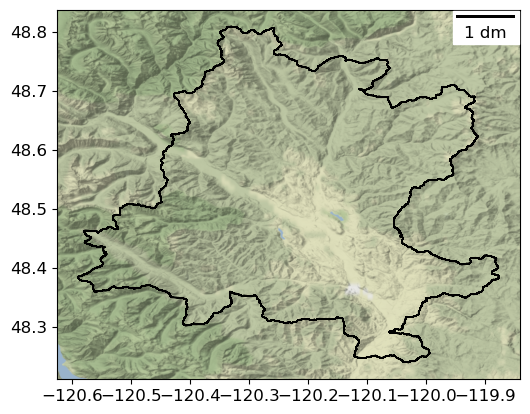

In [55]:
basemap = cx.providers.Stamen.TerrainBackground

fig, ax = plt.subplots()

ax.add_artist(ScaleBar(1))
met_outline.plot(ax=ax, facecolor='none', edgecolor='k')
cx.add_basemap(ax=ax, attribution=False, crs='epsg:4326', 
               source=basemap, zoom=11)

<AxesSubplot: >

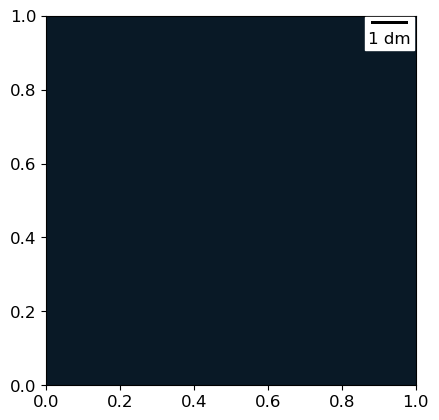

In [48]:
fig, ax = plt.subplots()

ax.add_artist(ScaleBar(1))
cx.add_basemap(ax=ax, attribution=False, crs='epsg:4326', 
               source=basemap, zoom=12)
met_outline.plot(ax=ax, facecolor='none', edgecolor='k')
snotel_geom[0:2].plot(ax=ax, facecolor='white', edgecolor='black', marker='*', markersize=100)


In [17]:
coast = gpd.read_file('../../../data/site_outlines/cb_2018_us_nation_5m/cb_2018_us_nation_5m.shp')

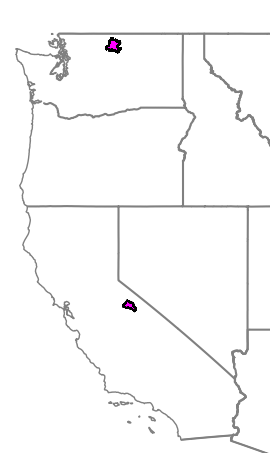

In [23]:
#basemap = cx.providers.Stamen.TerrainBackground
extent = ([-125, 32, -113, 50])

f, axa = plt.subplots()

met_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
tuol_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
gm_outline.to_crs('epsg:4326').plot(ax=axa, facecolor='magenta', edgecolor='k')
states.plot(ax=axa, edgecolor='gray')
coast.plot(ax=axa, edgecolor='gray', facecolor='none')
axa.set_xlim(extent[0], extent[2])
axa.set_ylim(extent[1], extent[3])
#cx.add_basemap(axa, attribution=False, crs='epsg:4326', source=basemap, zoom=9)
plt.xticks(rotation=45)
axa.set_axis_off()
axa.set_ylabel('')
plt.tight_layout()
plt.savefig('../../figures/polished/tm_sites_map_skeleton.jpeg',dpi=500)

In [ ]:
basemap = cx.providers.Stamen.TerrainBackground
extent = ([-125, 37, -105, 50])

f, axa = plt.subplots(figsize=(10,10))

met_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
tuol_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
gm_outline.to_crs('epsg:4326').plot(ax=axa, facecolor='magenta', edgecolor='k')
states.plot(ax=axa, edgecolor='gray')

axa.set_xlim(extent[0], extent[2])
axa.set_ylim(extent[1], extent[3])
cx.add_basemap(axa, attribution=False, crs='epsg:4326', source=basemap, zoom=9)
plt.xticks(rotation=45)
axa.set_xlabel('Longitude')
axa.set_ylabel('Latitude')
plt.tight_layout()
#plt.savefig('../figures/sites_map.jpeg',dpi=500)

In [139]:
atl06sr_gdf.head()

distance   h_sigma  rgt    delta_time  \
time                                                                       
2018-10-15 23:22:20.018965444  4.215353e+06  0.033182  265  2.488094e+07   
2018-10-15 23:22:20.021811344  4.215373e+06  0.028329  265  2.488094e+07   
2018-10-15 23:22:20.027481712  4.215413e+06  0.032855  265  2.488094e+07   
2018-10-15 23:22:20.030305900  4.215434e+06  0.041974  265  2.488094e+07   
2018-10-15 23:22:20.033126928  4.215454e+06  0.045422  265  2.488094e+07   

                               pflags  dh_fit_dy  segment_id  \
time                                                           
2018-10-15 23:22:20.018965444       0        0.0      210188   
2018-10-15 23:22:20.021811344       0        0.0      210189   
2018-10-15 23:22:20.027481712       0        0.0      210191   
2018-10-15 23:22:20.030305900       0        0.0      210192   
2018-10-15 23:22:20.033126928       0        0.0      210193   

                               w_surface_window_final  dh_fit_dx       h_mean  \
time                                                                            
2018-10-15 23:22:20.018965444                     3.0  -0.018228  2501.377184   
2018-10-15 23:22:20.021811344                     3.0  -0.010939  2501.116873   
2018-10-15 23:22:20.027481712                     3.0  -0.000515  2501.053838   
2018-10-15 23:22:20.030305900                     3.0   0.008181  2501.176924   
2018-10-15 23:22:20.033126928                     3.0   0.004802  2501.271832   

                               ...  lidar_z_20m  difference_20m  slope_3m  \
time                           ...                                          
2018-10-15 23:22:20.018965444  ...  2501.780029       -0.402845  1.725123   
2018-10-15 23:22:20.021811344  ...  2501.500000       -0.383127  4.888882   
2018-10-15 23:22:20.027481712  ...  2501.010010        0.043828  1.540184   
2018-10-15 23:22:20.030305900  ...  2501.149902        0.027022  3.003147   
2018-10-15 23:22:20.033126928  ...  2501.229980        0.041852  3.440679   

                               slope_20m  slope_100m diff_plus  diff_plus_20m  \
time                                                                            
2018-10-15 23:22:20.018965444   1.438880         NaN -0.177670      -0.269368   
2018-10-15 23:22:20.021811344   2.426852         NaN  0.062020      -0.249650   
2018-10-15 23:22:20.027481712   1.872145         NaN -0.011026       0.177305   
2018-10-15 23:22:20.030305900   1.279436         NaN  0.171875       0.160498   
2018-10-15 23:22:20.033126928   1.804145         NaN -0.173158       0.175328   

                               ASO_snowon  ASO_snowon_date ASO_snowon_20m  
time                                                                       
2018-10-15 23:22:20.018965444         NaN              NaN            NaN  
2018-10-15 23:22:20.021811344         NaN              NaN            NaN  
2018-10-15 23:22:20.027481712         NaN              NaN            NaN  
2018-10-15 23:22:20.030305900         NaN              NaN            NaN  
2018-10-15 23:22:20.033126928         NaN              NaN            NaN  

[5 rows x 34 columns]

In [69]:
cdec_geom

geometry  elevation_m     site
0                     POINT (293306.562 4194327.335)      2621.28      tum
1                     POINT (301551.877 4196788.619)      2965.00      dan
2  POLYGON ((298306.562 4194327.335, 298282.486 4...          NaN  tum_5km
3  POLYGON ((306551.877 4196788.619, 306527.800 4...          NaN  dan_5km

In [115]:
atl06sr_gdf.crs

<Derived Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

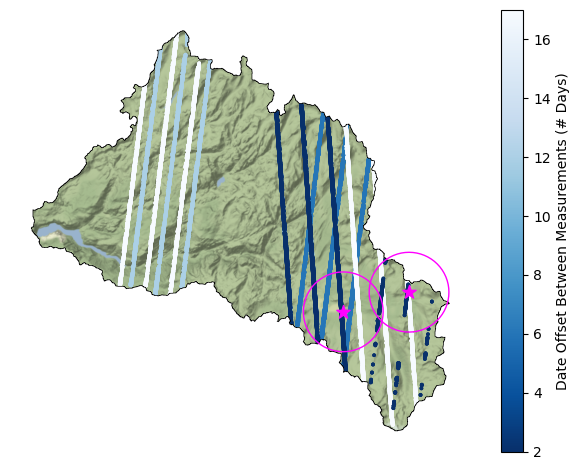

In [144]:
basemap = cx.providers.Stamen.TerrainBackground

fig, ax = plt.subplots()

atl06sr_gdf[atl06sr_gdf['ASO_snowon_date'].isin(aso_date_list)].plot(column='date_offset', cmap='Blues_r', ax=ax, markersize=3, legend=True, legend_kwds={'label':'Date Offset Between Measurements (# Days)'})
outline_gdf.plot(ax=ax, facecolor='none', edgecolor='k')
cx.add_basemap(ax=ax, attribution=False, crs='epsg:32611', source=basemap, zoom=11)
tuol_reverse.plot(ax=ax, facecolor='white')
cdec_geom[0:2].plot(ax=ax, color='magenta', marker='*', markersize=100)
cdec_geom[2:].plot(ax=ax, facecolor='none',edgecolor='magenta')
ax.set_axis_off()
plt.tight_layout()
plt.savefig('../../figures/date_offset_map.jpeg', dpi=300)

In [145]:
methow_dtm = rxr.open_rasterio('../../../data/lidar/methow/dtm/methow_basin_2018_dtm_combined_32610_10m.tif', masked=True).squeeze()
tuol_dtm = rxr.open_rasterio('../../../data/lidar/tuolumne/snow_off/ASO_snowoff_linux/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_10m_ma_only.tif', masked=True).squeeze()
gm_dtm = rxr.open_rasterio('../../../data/lidar/grandmesa/snowoff/ASO_3M_PCDTM_USCOGM_20160926_20160926.tif', masked=True).squeeze()


In [31]:
tuol_dtm_src = rio.open('../../data/lidar/tuolumne/snow_off/ASO_snowoff_linux/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_10m_ma_only.tif', masked=True)


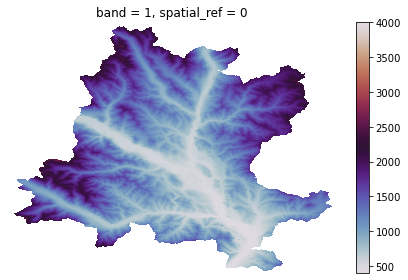

In [45]:
fig, ax = plt.subplots()
methow_dtm.plot(cmap='twilight', ax=ax, vmin=400, vmax=4000)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('../figures/methow_dtm_scale.jpeg', dpi=300, transparent=True)

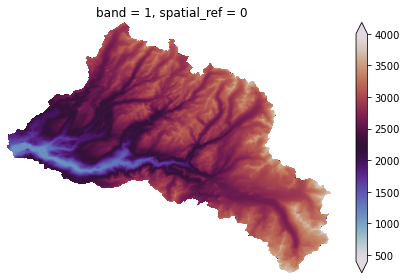

In [44]:
fig, ax = plt.subplots()
tuol_dtm.plot(cmap='twilight', ax=ax, vmin=400, vmax=4000)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('../figures/tuol_dtm_scale.jpeg', transparent=True, dpi=300)
#1188 m to 3965 m

In [35]:
tuol_dtm.min()

<xarray.DataArray ()>
array(-376.15466, dtype=float32)
Coordinates:
    band         int64 1
    spatial_ref  int64 0

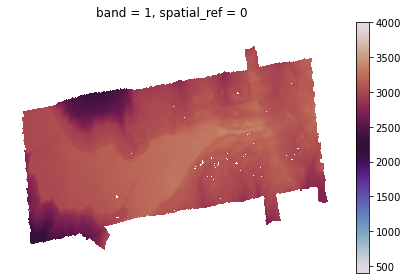

In [47]:
fig, ax = plt.subplots()
gm_dtm.plot(cmap='twilight', ax=ax, vmin=400, vmax=4000)
ax.set_axis_off()
#plt.legend('Elevation (m)')
plt.tight_layout()
plt.savefig('../figures/gm_dtm_scale.jpeg', dpi=300)